In [1]:
import pandas as pd

In [2]:
nbp = pd.read_csv("nbp.csv")
peg = pd.read_csv("peg.csv")
the = pd.read_csv("the.csv")
ttf = pd.read_csv("ttf.csv")
ztp = pd.read_csv("ztp.csv")

In [3]:
nbp.head()

,Date,HIGH,LOW,OPEN,CLOSE,VOLUME,ticker
0,2010-01-04,37.90,35.50,37.00,35.57,5795.0,NGLNMc1
1,2010-01-05,37.60,36.25,36.25,37.38,5005.0,NGLNMc1
2,2010-01-06,37.25,36.15,36.81,37.00,7630.0,NGLNMc1
3,2010-01-07,39.00,36.60,37.00,37.27,10130.0,NGLNMc1
4,2010-01-08,36.25,35.10,36.00,35.22,8245.0,NGLNMc1


In [4]:
gbpeur = pd.read_csv("gbpeur.csv")

In [5]:
hubs = [nbp, peg, the, ttf, ztp, gbpeur]

In [6]:
for hub in hubs:
    hub["Date"] = pd.to_datetime(hub["Date"])
    hub.set_index("Date", inplace=True)

In [9]:
import numpy as np
min_dates = []

for hub in hubs:
    min_dates.append(np.min(hub.index.to_list()))

In [10]:
min_dates

[Timestamp('2010-01-04 00:00:00'),
 Timestamp('2018-09-28 00:00:00'),
 Timestamp('2015-01-02 00:00:00'),
 Timestamp('2010-03-12 00:00:00'),
 Timestamp('2014-11-28 00:00:00'),
 Timestamp('2010-01-01 00:00:00')]

In [11]:
for idx, hub in enumerate(hubs):
    hubs[idx] = hub[hub.index >= '2018-10-01'].copy()

In [12]:
nbp, peg, the, ttf, ztp, gbpeur = hubs[0], hubs[1], hubs[2], hubs[3], hubs[4], hubs[5]

In [13]:
gbpeur.tail()

,CLOSE,HIGH,LOW,OPEN,COUNT,ticker
Date,,,,,,
2024-08-26,1.1811,1.1833,1.1789,1.1798,19596.0,GBPEUR=
2024-08-27,1.1850,1.1859,1.1805,1.1807,20530.0,GBPEUR=
2024-08-28,1.1862,1.1890,1.1832,1.1844,22115.0,GBPEUR=
2024-08-29,1.1882,1.1900,1.1856,1.1859,22926.0,GBPEUR=
2024-08-30,1.1874,1.1904,1.1856,1.1880,21146.0,GBPEUR=


In [14]:
nbp_eur_mwh = nbp.copy()

In [15]:
nbp_eur_mwh[['CLOSE']] = nbp_eur_mwh[['CLOSE']]  * gbpeur[['CLOSE']]  /(2.9307)

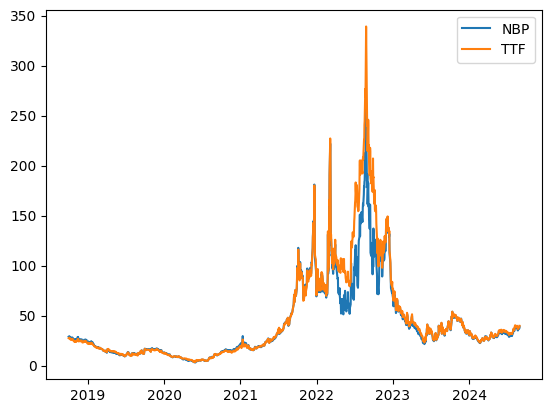

In [16]:
import matplotlib.pyplot as plt

plt.plot(nbp_eur_mwh.index, nbp_eur_mwh[['CLOSE']], label = "NBP")

plt.plot(ttf.index, ttf[['CLOSE']], label = "TTF")
plt.legend()
plt.show()

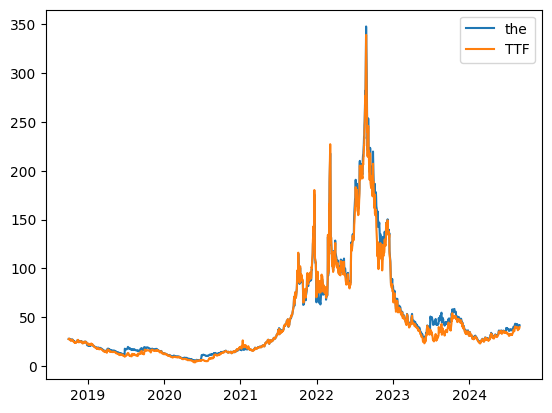

In [17]:
import matplotlib.pyplot as plt

plt.plot(the.index, the[['CLOSE']], label = "the")

plt.plot(ttf.index, ttf[['CLOSE']], label = "TTF")
plt.legend()
plt.show()

In [18]:

# Drop duplicate indices
nbp_eur_mwh = nbp_eur_mwh[~nbp_eur_mwh.index.duplicated(keep='first')]
peg = peg[~peg.index.duplicated(keep='first')]
the = the[~the.index.duplicated(keep='first')]
ttf = ttf[~ttf.index.duplicated(keep='first')]
ztp = ztp[~ztp.index.duplicated(keep='first')]

combined_hubs = pd.concat([nbp_eur_mwh[['CLOSE']], peg[['CLOSE']], the[['CLOSE']], ttf[['CLOSE']], ztp[['CLOSE']]], axis=1)
combined_hubs.columns = ['NBP', 'PEG', 'THE', 'TTF', 'ZTP']


In [19]:
combined_hubs.head()

,NBP,PEG,THE,TTF,ZTP
Date,,,,,
2018-10-01,28.877126,27.586,27.602,27.443,27.18
2018-10-02,28.446208,27.624,27.496,27.257,27.23
2018-10-03,28.430963,27.431,27.477,27.114,27.10
2018-10-04,28.728898,27.635,27.852,27.471,27.43
2018-10-05,29.268868,28.344,27.535,27.902,27.84


In [47]:
last_2yrs = combined_hubs.loc['2022-09-01':]

In [22]:
#combined_hubs = log_combined_hubs

In [23]:
combined_hubs = combined_hubs.interpolate(method='linear', axis=0)

In [45]:
log_combined_hubs = np.log(combined_hubs)

In [ ]:
log_combined_hubs.describe()

In [24]:
combined_hubs_pct_return = combined_hubs.pct_change(fill_method=None)
combined_hubs_pct_return.head()

,NBP,PEG,THE,TTF,ZTP
Date,,,,,
2018-10-01,NaN,NaN,NaN,NaN,NaN
2018-10-02,-0.014922,0.001378,-0.003840,-0.006778,0.001840
2018-10-03,-0.000536,-0.006987,-0.000691,-0.005246,-0.004774
2018-10-04,0.010479,0.007437,0.013648,0.013167,0.012177
2018-10-05,0.018795,0.025656,-0.011382,0.015689,0.014947


In [25]:
import plotly.express as px
fig = px.line(
    combined_hubs,
    x=combined_hubs.index,
    y=combined_hubs.columns,
    title='Energy Hubs',
    labels={'value': 'Price', 'variable': 'Hubs'}
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Hubs'
)


fig.show()

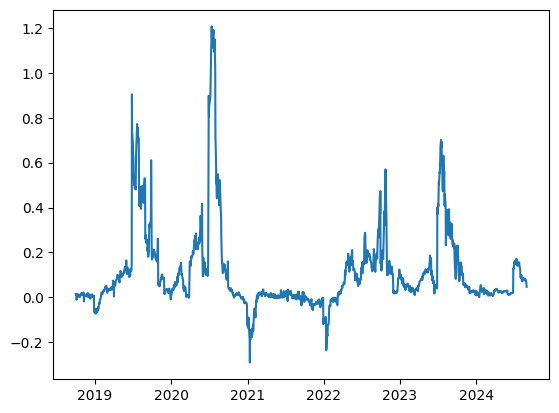

In [26]:
plt.plot(combined_hubs.index, (combined_hubs["THE"] - combined_hubs["ZTP"]) / combined_hubs["TTF"])
plt.show()

In [ ]:
combined_hubs

In [27]:
combined_hubs_pct_return.corr()

,NBP,PEG,THE,TTF,ZTP
NBP,1.000000,0.901423,0.714807,0.903458,0.907774
PEG,0.901423,1.000000,0.737216,0.932925,0.969015
THE,0.714807,0.737216,1.000000,0.793179,0.761103
TTF,0.903458,0.932925,0.793179,1.000000,0.955097
ZTP,0.907774,0.969015,0.761103,0.955097,1.000000


In [31]:
combined_hubs.head()

,NBP,PEG,THE,TTF,ZTP
Date,,,,,
2018-10-01,28.877126,27.586,27.602,27.443,27.18
2018-10-02,28.446208,27.624,27.496,27.257,27.23
2018-10-03,28.430963,27.431,27.477,27.114,27.10
2018-10-04,28.728898,27.635,27.852,27.471,27.43
2018-10-05,29.268868,28.344,27.535,27.902,27.84


In [43]:
log_combined_hubs

,NBP,PEG,THE,TTF,ZTP
Date,,,,,
2018-10-01,3.363050,3.317308,3.317888,3.312111,3.302481
2018-10-02,3.348015,3.318685,3.314041,3.305310,3.304319
2018-10-03,3.347479,3.311674,3.313349,3.300050,3.299534
2018-10-04,3.357904,3.319083,3.326905,3.313131,3.311637
2018-10-05,3.376524,3.344415,3.315458,3.328698,3.326474
...,...,...,...,...,...
2024-08-26,NaN,3.622152,3.702634,3.628492,3.628067
2024-08-27,3.629786,3.644117,3.720669,3.655555,3.651593
2024-08-28,3.625852,3.643254,3.719142,3.651178,3.651878


In [29]:
%load_ext rpy2.ipython

In [49]:
%%R -i log_combined_hubs
library(tseries)

nbp <- log_combined_hubs$NBP
peg <- log_combined_hubs$PEG
the <- log_combined_hubs$THE
ttf <- log_combined_hubs$TTF
ztp <- log_combined_hubs$ZTP

print(adf.test(nbp, k = 5))
print(adf.test(peg, k = 5))
print(adf.test(the, k = 5))
print(adf.test(ttf, k = 5))
print(adf.test(ztp, k = 5))


	Augmented Dickey-Fuller Test

data:  nbp
Dickey-Fuller = -1.7745, Lag order = 5, p-value = 0.6738
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  peg
Dickey-Fuller = -1.6429, Lag order = 5, p-value = 0.7295
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  the
Dickey-Fuller = -1.4997, Lag order = 5, p-value = 0.7901
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ttf
Dickey-Fuller = -1.4825, Lag order = 5, p-value = 0.7974
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ztp
Dickey-Fuller = -1.5864, Lag order = 5, p-value = 0.7534
alternative hypothesis: stationary



In [50]:
%%R -i last_2yrs
library(tseries)

nbp <- last_2yrs$NBP
peg <- last_2yrs$PEG
the <- last_2yrs$THE
ttf <- last_2yrs$TTF
ztp <- last_2yrs$ZTP

print(adf.test(nbp, k = 5))
print(adf.test(peg, k = 5))
print(adf.test(the, k = 5))
print(adf.test(ttf, k = 5))
print(adf.test(ztp, k = 5))


	Augmented Dickey-Fuller Test

data:  nbp
Dickey-Fuller = -3.4015, Lag order = 5, p-value = 0.0532
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  peg
Dickey-Fuller = -3.804, Lag order = 5, p-value = 0.0188
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  the
Dickey-Fuller = -4.0354, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ttf
Dickey-Fuller = -4.2979, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ztp
Dickey-Fuller = -3.5086, Lag order = 5, p-value = 0.04148
alternative hypothesis: stationary



In addition: Warning messages:
1: In adf.test(the, k = 5) : p-value smaller than printed p-value
2: In adf.test(ttf, k = 5) : p-value smaller than printed p-value


In [41]:
%%R -i combined_hubs
library(tseries)

nbp <- combined_hubs$NBP
peg <- combined_hubs$PEG
the <- combined_hubs$THE
ttf <- combined_hubs$TTF
ztp <- combined_hubs$ZTP

print(adf.test(nbp, k = 5))
print(adf.test(peg, k = 5))
print(adf.test(the, k = 5))
print(adf.test(ttf, k = 5))
print(adf.test(ztp, k = 5))




	Augmented Dickey-Fuller Test

data:  nbp
Dickey-Fuller = -2.9825, Lag order = 5, p-value = 0.1624
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  peg
Dickey-Fuller = -2.7412, Lag order = 5, p-value = 0.2646
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  the
Dickey-Fuller = -2.1788, Lag order = 5, p-value = 0.5026
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ttf
Dickey-Fuller = -2.2341, Lag order = 5, p-value = 0.4792
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ztp
Dickey-Fuller = -2.5724, Lag order = 5, p-value = 0.336
alternative hypothesis: stationary



In [52]:
%%R

# Install necessary packages
install.packages("moments")    # For skewness, kurtosis, Jarque-Bera test
install.packages("tseries")    # For ADF test
install.packages("forecast")   # For Ljung-Box Q test
install.packages("urca")       # For KPSS test


--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Guangzhou) [https]
20: China (Jinan) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) [https]

trying URL 'https://cran.uib.no/bin/macosx/big-sur-x86_64/contrib/4.3/moments_0.14.1.tgz'
Content type 'application/x-gzip' length 54809 bytes (53 KB)
downloaded 53 KB

trying URL 'https://cran.uib.no/bin/macosx/big-sur-x86_64/contrib/4.3/tseries_0.10-57.tgz'
Content type 'application/x-gzip' length 422450 bytes (412 KB)
downloaded 412 KB

also installing the dependencies ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘pkgconfig’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘colorspace’, ‘fracdiff’, ‘generics’, ‘ggplot2’, ‘Rcpp’, ‘timeDate’, ‘RcppArmadillo’

trying URL 'https://cran.uib.no/bin/macosx/big-sur-x86_64/contrib/4.3/farver_2.1.2.tgz'
Content type 'application/x-gzip' length 2016145 bytes (1.9 MB)
downloaded 1.9 MB

trying URL 'https://cran.uib.no/bin/macosx/big-sur-x86_64/contrib/4.3/labeling_0.4.3.tgz'
Content type 'application/x-gzip' length 61221 bytes (59 KB)
downloaded 59 KB

trying URL 'https://cran.uib.no/bin/macosx/big-sur-x86_64/contrib/4.3/munsell_0.5

In [57]:
%%R
# Load necessary libraries
library(moments)   # For skewness, kurtosis, Jarque-Bera
library(tseries)   # For ADF test
library(forecast)  # For Ljung-Box Q test
library(urca)      # For KPSS test


nbp <- combined_hubs$NBP
peg <- combined_hubs$PEG
the <- combined_hubs$THE
ttf <- combined_hubs$TTF
ztp <- combined_hubs$ZTP


# Define a function to calculate the statistics with 5 lags
calculate_statistics <- function(data) {
  mean_val <- mean(data, na.rm = TRUE)
  sd_val <- sd(data, na.rm = TRUE)
  skewness_val <- skewness(data, na.rm = TRUE)
  kurtosis_val <- kurtosis(data, na.rm = TRUE)
  jarque_bera_val <- jarque.test(data)
  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)
  adf_val <- adf.test(data, k = 5)
  
  return(list(mean = mean_val,
              std_dev = sd_val,
              skewness = skewness_val,
              kurtosis = kurtosis_val,
              jarque_bera = jarque_bera_val,
              ljung_box = ljung_box_val,
              kpss = summary(kpss_val),
              adf = adf_val))
}

# Calculate for each hub
nbp_stats <- calculate_statistics(nbp)
peg_stats <- calculate_statistics(peg)
the_stats <- calculate_statistics(the)
ttf_stats <- calculate_statistics(ttf)
ztp_stats <- calculate_statistics(ztp)

# Print results
print("NBP Statistics:")
print(nbp_stats)

print("PEG Statistics:")
print(peg_stats)

print("THE Statistics:")
print(the_stats)

print("TTF Statistics:")
print(ttf_stats)

print("ZTP Statistics:")
print(ztp_stats)


[1] "NBP Statistics:"
$mean
[1] 41.43028

$std_dev
[1] 38.5427

$skewness
[1] 1.848849

$kurtosis
[1] 6.712098

$jarque_bera

	Jarque-Bera Normality Test

data:  data
JB = 1743.2, p-value < 2.2e-16
alternative hypothesis: greater


$ljung_box

	Box-Ljung test

data:  data
X-squared = 7153.1, df = 5, p-value < 2.2e-16


$kpss

####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 7.1041 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


$adf

	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -2.9825, Lag order = 5, p-value = 0.1624
alternative hypothesis: stationary


[1] "PEG Statistics:"
$mean
[1] 42.42978

$std_dev
[1] 40.13314

$skewness
[1] 1.740303

$kurtosis
[1] 5.949417

$jarque_bera

	Jarque-Bera Normality Test

data:  data
JB = 1321.7, p-value < 2.2e-16
alternative hypothesis: greater


$ljung_box

	Box-Lj

In [168]:
%%R -i combined_hubs

library(tseries)

nbp <- combined_hubs$NBP
ttf <- combined_hubs$TTF

eg_regression <- lm(ttf ~ nbp) #lm includes constant term

residuals <- eg_regression$residuals

adf_test <- adf.test(residuals)

print(adf_test)



	Augmented Dickey-Fuller Test

data:  residuals
Dickey-Fuller = -3.2977, Lag order = 11, p-value = 0.07107
alternative hypothesis: stationary



In [169]:
%%R -i combined_hubs

library(tseries)

nbp <- combined_hubs$NBP
ttf <- combined_hubs$TTF

eg_regression <- lm(ttf ~ nbp) #lm includes constant term


In [170]:
%%R
library(urca)
selected_hubs <- combined_hubs[,c("NBP", "TTF")]
johansen_test_all_hubs <- ca.jo(selected_hubs, type="trace", ecdet="none", spec="longrun")

summary(johansen_test_all_hubs)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.0149403917 0.0009540979

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  1.45  6.50  8.18 11.65
r = 0  | 24.36 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           NBP.l2    TTF.l2
NBP.l2  1.0000000  1.000000
TTF.l2 -0.9262892 -2.775766

Weights W:
(This is the loading matrix)

            NBP.l2      TTF.l2
NBP.d -0.036439196 0.001027925
TTF.d -0.005252212 0.001022713



In [97]:
%%R
selected_hubs <- combined_hubs[,c("PEG", "ZTP")]
jotest <- ca.jo(selected_hubs, type="trace", ecdet="none", spec="longrun")

summary(jotest)


###################### 
# Johansen-Procedure #

 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.058291940 0.004907873

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  7.49  6.50  8.18 11.65
r = 0  | 98.90 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           PEG.l2   ZTP.l2
PEG.l2  1.0000000 1.000000
ZTP.l2 -0.9107101 3.321149

Weights W:
(This is the loading matrix)

           PEG.l2       ZTP.l2
PEG.d -0.13457647 -0.001957612
ZTP.d -0.01599925 -0.002169527



In [172]:
%%R
test_stats <- jotest@teststat
crit_values_5pct <- jotest@cval[,2]

test_summary_5pct <- data.frame(
  Rank = c("r <= 1", "r = 0"),
  Test_Statistic = test_stats,
  five_pct_Critical_Value = crit_values_5pct
)

print(test_summary_5pct)

coefficients_first_column <- jotest@V[,1, drop=FALSE]

print(coefficients_first_column)


           Rank Test_Statistic five_pct_Critical_Value
r <= 1 | r <= 1       1.649414                    8.18
r = 0  |  r = 0      70.314939                   17.95
           PEG.l2
PEG.l2  1.0000000
ZTP.l2 -0.9781671


In [96]:
combined_hubs

,NBP,PEG,THE,TTF,ZTP
Date,,,,,
2018-10-01,28.877126,27.586,27.602,27.443,27.180
2018-10-02,28.446208,27.624,27.496,27.257,27.230
2018-10-03,28.430963,27.431,27.477,27.114,27.100
2018-10-04,28.728898,27.635,27.852,27.471,27.430
2018-10-05,29.268868,28.344,27.535,27.902,27.840
...,...,...,...,...,...
2024-08-26,36.676953,37.418,40.554,37.656,37.640
2024-08-27,37.704729,38.249,41.292,38.689,38.536
2024-08-28,37.556726,38.216,41.229,38.520,38.547


In [95]:
%%R

hub_pairs <- combn(names(combined_hubs), 2, simplify = FALSE)

results <- data.frame()

for (pair in hub_pairs) {
  selected_hubs <- combined_hubs[, pair]
  
  jotest <- ca.jo(selected_hubs, type="trace", ecdet="none", spec="longrun")
  
  test_stats <- jotest@teststat
  crit_values_5pct <- jotest@cval[,2]
  
  coefficients_first_column <- jotest@V[,1]

  temp_df <- data.frame(
    Pair = paste(pair[1], "-", pair[2]),
    Rank = c("r <= 1", "r = 0"),
    Test_Statistic = test_stats,
    Significant_at_5_pct = test_stats > crit_values_5pct,
    `Coefficient 1` = coefficients_first_column
  )

  results <- rbind(results, temp_df)
}

print(results)


               Pair   Rank Test_Statistic Significant_at_5_pct Coefficient.1
r <= 1 |  NBP - PEG r <= 1       8.165623                FALSE     1.0000000
r = 0  |  NBP - PEG  r = 0      66.579096                 TRUE    -0.9417167
r <= 1 |1 NBP - THE r <= 1       4.935439                FALSE     1.0000000
r = 0  |1 NBP - THE  r = 0      32.555978                 TRUE    -0.6875931
r <= 1 |2 NBP - TTF r <= 1       5.193112                FALSE     1.0000000
r = 0  |2 NBP - TTF  r = 0      32.015093                 TRUE    -0.7157918
r <= 1 |3 NBP - ZTP r <= 1       6.959433                FALSE     1.0000000
r = 0  |3 NBP - ZTP  r = 0      40.933959                 TRUE    -0.8385289
r <= 1 |4 PEG - THE r <= 1       5.867441                FALSE     1.0000000
r = 0  |4 PEG - THE  r = 0      50.595214                 TRUE    -0.7752371
r <= 1 |5 PEG - TTF r <= 1       6.472239                FALSE     1.0000000
r = 0  |5 PEG - TTF  r = 0      57.354106                 TRUE    -0.8063651

In [61]:
%%R
# Loop through the results dataframe to generate plots for each pair
for (i in seq(1, nrow(results), by = 2)) {
  # Extract the hub pair and coefficient
  pair <- results$Pair[i]
  hubs <- unlist(strsplit(pair, " - "))
  
  # Extract the relevant coefficient
  coefficient <- results$Coefficient.1[i + 1]  # Coefficient for r = 0
  
  # Calculate the spread
  spread <- combined_hubs[[hubs[1]]] + coefficient * combined_hubs[[hubs[2]]]
  
  print(pair)
  print(adf.test(spread, k=5))
}


[1] "NBP - PEG"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.5522, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "NBP - THE"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.0028, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "NBP - TTF"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.0895, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "NBP - ZTP"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.5854, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "PEG - THE"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.6385, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "PEG - TTF"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.6189, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "PEG - ZTP"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.7

In addition: Warning messages:
1: In adf.test(spread, k = 5) : p-value smaller than printed p-value
2: In adf.test(spread, k = 5) : p-value smaller than printed p-value
3: In adf.test(spread, k = 5) : p-value smaller than printed p-value
4: In adf.test(spread, k = 5) : p-value smaller than printed p-value
5: In adf.test(spread, k = 5) : p-value smaller than printed p-value
6: In adf.test(spread, k = 5) : p-value smaller than printed p-value
7: In adf.test(spread, k = 5) : p-value smaller than printed p-value
8: In adf.test(spread, k = 5) : p-value smaller than printed p-value
9: In adf.test(spread, k = 5) : p-value smaller than printed p-value
10: In adf.test(spread, k = 5) : p-value smaller than printed p-value


In [67]:
%%R

# Initialize a data frame to store the spreads
spreads <- data.frame(Time = rownames(combined_hubs))

# Loop through the results dataframe to calculate each spread
for (i in seq(1, nrow(results), by = 2)) {
  # Extract the hub pair and coefficient
  pair <- results$Pair[i]
  hubs <- unlist(strsplit(pair, " - "))
  
  # Extract the relevant coefficient for r = 0
  coefficient <- results$Coefficient.1[i + 1]  
  
  # Calculate the spread
  spread <- combined_hubs[[hubs[1]]] + coefficient * combined_hubs[[hubs[2]]]
  
  # Store the spread in the spreads data frame with a column named after the pair
  spreads[[paste(hubs[1], hubs[2], sep = "_")]] <- spread
}





In [75]:
%%R
nbp_ttf <- nbp_ttf[["NBP_TTF"]]
print(nbp_ttf)

Error in nbp_ttf[["NBP_TTF"]] : subscript out of bounds


RInterpreterError: Failed to parse and evaluate line 'nbp_ttf <- nbp_ttf[["NBP_TTF"]]\nprint(nbp_ttf)\n'.
R error message: 'Error in nbp_ttf[["NBP_TTF"]] : subscript out of bounds'

In [72]:
%%R

library(moments)   # For skewness, kurtosis, Jarque-Bera
library(tseries)   # For ADF test
library(forecast)  # For Ljung-Box Q test
library(urca)      # For KPSS test

nbp_ttf <- spreads$NBP_TTF

calculate_statistics <- function(data) {
  mean_val <- mean(data, na.rm = TRUE)
  sd_val <- sd(data, na.rm = TRUE)
  skewness_val <- skewness(data, na.rm = TRUE)
  kurtosis_val <- kurtosis(data, na.rm = TRUE)
  jarque_bera_val <- jarque.test(data)
  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)
  adf_val <- adf.test(data, k = 5)

calculate_statistics(nbp_ttf)


RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_INCOMPLETE

In [68]:
%%R



nbp_ttf <- spreads$NBP_TTF
peg_ttf <- spreads$PEG_TTF
the_ttf <- spreads$THE_TTF
ztp_the <- spreads$ZTP_THE


# Define a function to calculate the statistics with 5 lags
calculate_statistics <- function(data) {
  mean_val <- mean(data, na.rm = TRUE)
  sd_val <- sd(data, na.rm = TRUE)
  skewness_val <- skewness(data, na.rm = TRUE)
  kurtosis_val <- kurtosis(data, na.rm = TRUE)
  jarque_bera_val <- jarque.test(data)
  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)
  adf_val <- adf.test(data, k = 5)
  
  return(list(mean = mean_val,
              std_dev = sd_val,
              skewness = skewness_val,
              kurtosis = kurtosis_val,
              jarque_bera = jarque_bera_val,
              ljung_box = ljung_box_val,
              kpss = summary(kpss_val),
              adf = adf_val))
}

# Calculate for each hub
nbp_ttf_stats <- calculate_statistics(nbp_ttf)
peg_ttf_stats <- calculate_statistics(peg_ttf)
the_ttf_stats <- calculate_statistics(the_ttf)
ztp_the_stats <- calculate_statistics(ztp_the)

# Print results
print("NBP TTF Statistics:")
print(nbp_ttf_stats)

print("PEG TTF Statistics:")
print(peg_ttf_stats)

print("THE TTF Statistics:")
print(the_ttf_stats)

print("ZTP THE Statistics:")
print(ztp_the_stats)

Error: node stack overflow
In addition: Warning messages:
1: In adf.test(data, k = 5) : p-value smaller than printed p-value
2: In adf.test(data, k = 5) : p-value smaller than printed p-value
3: In adf.test(data, k = 5) : p-value smaller than printed p-value
4: In mean.default(data, na.rm = TRUE) :
  argument is not numeric or logical: returning NA
Error: node stack overflow


RInterpreterError: Failed to parse and evaluate line '\n\n\nnbp_ttf <- spreads$NBP_TTF\npeg_ttf <- spreads$PEG_TTF\nthe_ttf <- spreads$THE_TTF\nztp_the <- spreads$ZTP_THE\n\n\n# Define a function to calculate the statistics with 5 lags\ncalculate_statistics <- function(data) {\n  mean_val <- mean(data, na.rm = TRUE)\n  sd_val <- sd(data, na.rm = TRUE)\n  skewness_val <- skewness(data, na.rm = TRUE)\n  kurtosis_val <- kurtosis(data, na.rm = TRUE)\n  jarque_bera_val <- jarque.test(data)\n  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")\n  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)\n  adf_val <- adf.test(data, k = 5)\n  \n  return(list(mean = mean_val,\n              std_dev = sd_val,\n              skewness = skewness_val,\n              kurtosis = kurtosis_val,\n              jarque_bera = jarque_bera_val,\n              ljung_box = ljung_box_val,\n              kpss = summary(kpss_val),\n              adf = adf_val))\n}\n\n# Calculate for each hub\nnbp_ttf_stats <- calculate_statistics(nbp_ttf)\npeg_ttf_stats <- calculate_statistics(peg_ttf)\nthe_ttf_stats <- calculate_statistics(the_ttf)\nztp_the_stats <- calculate_statistics(ztp_the)\n\n# Print results\nprint("NBP TTF Statistics:")\nprint(nbp_ttf_stats)\n\nprint("PEG TTF Statistics:")\nprint(peg_ttf_stats)\n\nprint("THE TTF Statistics:")\nprint(the_ttf_stats)\n\nprint("ZTP THE Statistics:")\nprint(ztp_the_stats)\n'.
R error message: 'Error: node stack overflow'
R stdout:
Error: node stack overflow
In addition: Warning messages:
1: In adf.test(data, k = 5) : p-value smaller than printed p-value
2: In adf.test(data, k = 5) : p-value smaller than printed p-value
3: In adf.test(data, k = 5) : p-value smaller than printed p-value
4: In mean.default(data, na.rm = TRUE) :
  argument is not numeric or logical: returning NA

In [63]:

%R -o spreads

spreads_df = pd.DataFrame(spreads)

spreads_df


,Time,NBP_PEG,NBP_THE,NBP_TTF,NBP_ZTP,PEG_THE,PEG_TTF,PEG_ZTP,THE_TTF,THE_ZTP,TTF_ZTP
1,2018-10-01 00:00:00,2.898929,9.898182,9.233651,6.085910,6.187907,5.456924,2.832899,-0.948146,-4.457871,-3.343634
2,2018-10-02 00:00:00,2.432226,9.540149,8.935871,5.613066,6.308082,5.644908,2.825363,-0.860643,-4.622848,-3.586269
3,2018-10-03 00:00:00,2.598732,9.537969,9.022984,5.706830,6.129811,5.567218,2.750756,-0.730873,-4.488508,-3.582018
4,2018-10-04 00:00:00,2.704557,9.578056,9.065381,5.728050,6.043098,5.483346,2.654221,-0.727276,-4.502756,-3.598807
5,2018-10-05 00:00:00,2.576850,10.335993,9.296845,5.924223,6.997848,5.844802,2.989830,-1.492664,-5.303367,-3.632212
...,...,...,...,...,...,...,...,...,...,...,...
1520,2024-08-26 00:00:00,1.439798,8.792304,9.723097,5.114725,5.979037,7.053518,3.138871,1.378825,-3.843849,-4.978617
1521,2024-08-27 00:00:00,1.685007,9.312636,10.011460,5.391179,6.237912,7.051542,3.153875,1.042151,-4.162716,-4.960511
1522,2024-08-28 00:00:00,1.568081,9.207952,9.984426,5.233952,6.253752,7.154818,3.110857,1.154969,-4.238691,-5.141971
1523,2024-08-29 00:00:00,1.113124,9.113116,9.560011,4.859970,6.653970,7.183503,3.196661,0.675701,-4.644307,-5.071165


In [76]:
spreads_df["Time"] = pd.to_datetime(spreads_df["Time"])
spreads_df.set_index("Time", inplace=True)

In [79]:
%%R -i spreads_df

nbp_ttf <- spreads_df$NBP_TTF
peg_ttf <- spreads_df$PEG_TTF
the_ttf <- spreads_df$THE_TTF
ztp_the <- spreads_df$ZTP_THE


# Define a function to calculate the statistics with 5 lags
calculate_statistics <- function(data) {
  mean_val <- mean(data, na.rm = TRUE)
  sd_val <- sd(data, na.rm = TRUE)
  skewness_val <- skewness(data, na.rm = TRUE)
  kurtosis_val <- kurtosis(data, na.rm = TRUE)
  jarque_bera_val <- jarque.test(data)
  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)
  adf_val <- adf.test(data, k = 5)
  
  return(list(mean = mean_val,
              std_dev = sd_val,
              skewness = skewness_val,
              kurtosis = kurtosis_val,
              jarque_bera = jarque_bera_val,
              ljung_box = ljung_box_val,
              kpss = summary(kpss_val),
              adf = adf_val))
}

# Calculate for each hub
nbp_ttf_stats <- calculate_statistics(nbp_ttf)
peg_ttf_stats <- calculate_statistics(peg_ttf)
the_ttf_stats <- calculate_statistics(the_ttf)
ztp_the_stats <- calculate_statistics(ztp_the)

# Print results
print("NBP TTF Statistics:")
print(nbp_ttf_stats)

print("PEG TTF Statistics:")
print(peg_ttf_stats)

print("THE TTF Statistics:")
print(the_ttf_stats)

print("ZTP THE Statistics:")
print(ztp_the_stats)

Error: node stack overflow
In addition: Warning messages:
1: In adf.test(data, k = 5) : p-value smaller than printed p-value
2: In adf.test(data, k = 5) : p-value smaller than printed p-value
3: In adf.test(data, k = 5) : p-value smaller than printed p-value
4: In mean.default(data, na.rm = TRUE) :
  argument is not numeric or logical: returning NA
Error: node stack overflow


RInterpreterError: Failed to parse and evaluate line '\nnbp_ttf <- spreads_df$NBP_TTF\npeg_ttf <- spreads_df$PEG_TTF\nthe_ttf <- spreads_df$THE_TTF\nztp_the <- spreads_df$ZTP_THE\n\n\n# Define a function to calculate the statistics with 5 lags\ncalculate_statistics <- function(data) {\n  mean_val <- mean(data, na.rm = TRUE)\n  sd_val <- sd(data, na.rm = TRUE)\n  skewness_val <- skewness(data, na.rm = TRUE)\n  kurtosis_val <- kurtosis(data, na.rm = TRUE)\n  jarque_bera_val <- jarque.test(data)\n  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")\n  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)\n  adf_val <- adf.test(data, k = 5)\n  \n  return(list(mean = mean_val,\n              std_dev = sd_val,\n              skewness = skewness_val,\n              kurtosis = kurtosis_val,\n              jarque_bera = jarque_bera_val,\n              ljung_box = ljung_box_val,\n              kpss = summary(kpss_val),\n              adf = adf_val))\n}\n\n# Calculate for each hub\nnbp_ttf_stats <- calculate_statistics(nbp_ttf)\npeg_ttf_stats <- calculate_statistics(peg_ttf)\nthe_ttf_stats <- calculate_statistics(the_ttf)\nztp_the_stats <- calculate_statistics(ztp_the)\n\n# Print results\nprint("NBP TTF Statistics:")\nprint(nbp_ttf_stats)\n\nprint("PEG TTF Statistics:")\nprint(peg_ttf_stats)\n\nprint("THE TTF Statistics:")\nprint(the_ttf_stats)\n\nprint("ZTP THE Statistics:")\nprint(ztp_the_stats)\n'.
R error message: 'Error: node stack overflow'
R stdout:
Error: node stack overflow
In addition: Warning messages:
1: In adf.test(data, k = 5) : p-value smaller than printed p-value
2: In adf.test(data, k = 5) : p-value smaller than printed p-value
3: In adf.test(data, k = 5) : p-value smaller than printed p-value
4: In mean.default(data, na.rm = TRUE) :
  argument is not numeric or logical: returning NA

In [80]:
%%R
print(spreads_df)

                          NBP_PEG      NBP_THE      NBP_TTF      NBP_ZTP
2018-10-01 00:00:00  2.898929e+00   9.89818180   9.23365084   6.08590970
2018-10-02 00:00:00  2.432226e+00   9.54014948   8.93587093   5.61306607
2018-10-03 00:00:00  2.598732e+00   9.53796859   9.02298399   5.70682967
2018-10-04 00:00:00  2.704557e+00   9.57805615   9.06538128   5.72805009
2018-10-05 00:00:00  2.576850e+00  10.33599279   9.29684464   5.92422286
2018-10-08 00:00:00  2.612820e+00   9.46175634   8.91083461   5.48185118
2018-10-09 00:00:00  2.583493e+00   9.31979403   8.84018061   5.57028885
2018-10-10 00:00:00  2.487031e+00   9.06591106   8.63114359   5.35427980
2018-10-11 00:00:00  2.566066e+00   8.92269579   8.47136145   5.23347035
2018-10-12 00:00:00  2.796250e+00   9.55026162   8.96096971   5.59042568
2018-10-15 00:00:00  2.648364e+00   9.45792229   8.93953705   5.51653391
2018-10-16 00:00:00  2.523708e+00   9.09158681   8.59051532   5.29033358
2018-10-17 00:00:00  2.519362e+00   9.04166063   8.

Exception ignored from cffi callback <function _consolewrite_ex at 0x10fe219e0>:
Traceback (most recent call last):
  File "/Users/sindrehaugland/Documents/Master/statistical-arbitrage/.conda/lib/python3.11/site-packages/rpy2/rinterface_lib/callbacks.py", line 136, in _consolewrite_ex
    consolewrite_print(s)
  File "/Users/sindrehaugland/Documents/Master/statistical-arbitrage/.conda/lib/python3.11/site-packages/rpy2/rinterface_lib/callbacks.py", line 119, in consolewrite_print
    print(s, end='', flush=True)
  File "/Users/sindrehaugland/Documents/Master/statistical-arbitrage/.conda/lib/python3.11/site-packages/ipykernel/iostream.py", line 609, in flush
    if not evt.wait(self.flush_timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sindrehaugland/Documents/Master/statistical-arbitrage/.conda/lib/python3.11/threading.py", line 629, in wait
    signaled = self._cond.wait(timeout)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sindrehaugland/Documents/Master/sta

   0.55431209
2020-05-12 00:00:00 -1.929312e-01   0.24632979   0.90099372   0.35203057
2020-05-13 00:00:00  1.796402e-02   0.28747530   0.96823758   0.47327247
2020-05-14 00:00:00  3.865967e-02   0.38617050   1.06900410   0.54437996
2020-05-15 00:00:00  9.193879e-02   0.43677282   1.07211265   0.53061688
2020-05-18 00:00:00 -4.622590e-02   0.19509164   0.87178278   0.36997130
2020-05-19 00:00:00  1.305237e-01   0.24821978   0.97284533   0.53423822
2020-05-20 00:00:00  1.037194e-01   0.18408916   0.90744378   0.48724723
2020-05-21 00:00:00  1.401188e-01   0.04351447   0.79311101   0.44199691
2020-05-22 00:00:00  5.800837e-02   0.07571109   0.81797397   0.39012259
2020-05-25 00:00:00 -6.794654e-01  -0.41674490   0.17760654  -0.27327638
2020-05-26 00:00:00  1.271791e-01   0.09389661   0.81099597   0.39970467
2020-05-27 00:00:00  1.723305e-01  -0.07248261   0.73025826   0.33963435
2020-05-28 00:00:00  1.038797e-01  -0.17243014   0.65274553   0.32184598
2020-05-29 00:00:00 -3.408806e-01   0

In [83]:
%%R 
nbp_ttf = spreads_df$NBP_PEG
mean_val <- mean(nbp_ttf, na.rm = TRUE)
sd_val <- sd(nbp_ttf, na.rm = TRUE)
skewness_val <- skewness(nbp_ttf, na.rm = TRUE)
kurtosis_val <- kurtosis(nbp_ttf, na.rm = TRUE)
jarque_bera_val <- jarque.test(nbp_ttf)
ljung_box_val <- Box.test(nbp_ttf, lag = 5, type = "Ljung-Box")
kpss_val <- ur.kpss(nbp_ttf, lags = "short", use.lag = 5)
adf_val <- adf.test(nbp_ttf, k = 5)

In addition: Warning message:
In adf.test(nbp_ttf, k = 5) : p-value smaller than printed p-value


In [94]:
%%R 
data = spreads_df$THE_ZTP
calculate_statistics <- function(data) {
  mean_val <- mean(data, na.rm = TRUE)
  sd_val <- sd(data, na.rm = TRUE)
  skewness_val <- skewness(data, na.rm = TRUE)
  kurtosis_val <- kurtosis(data, na.rm = TRUE)
  jarque_bera_val <- jarque.test(data)
  ljung_box_val <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_val <- ur.kpss(data, lags = "short", use.lag = 5)
  adf_val <- adf.test(data, k = 5)
  
  return(list(mean = mean_val,
              std_dev = sd_val,
              skewness = skewness_val,
              kurtosis = kurtosis_val,
              jarque_bera = jarque_bera_val,
              ljung_box = ljung_box_val,
              kpss = summary(kpss_val),
              adf = adf_val))
}

print(calculate_statistics(data))

$mean
[1] -3.579011

$std_dev
[1] 8.386882

$skewness
[1] 0.8678144

$kurtosis
[1] 15.44891

$jarque_bera

	Jarque-Bera Normality Test

data:  data
JB = 10032, p-value < 2.2e-16
alternative hypothesis: greater


$ljung_box

	Box-Ljung test

data:  data
X-squared = 5408.5, df = 5, p-value < 2.2e-16


$kpss

####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 1.2251 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


$adf

	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -5.6244, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary




In addition: Warning message:
In adf.test(data, k = 5) : p-value smaller than printed p-value


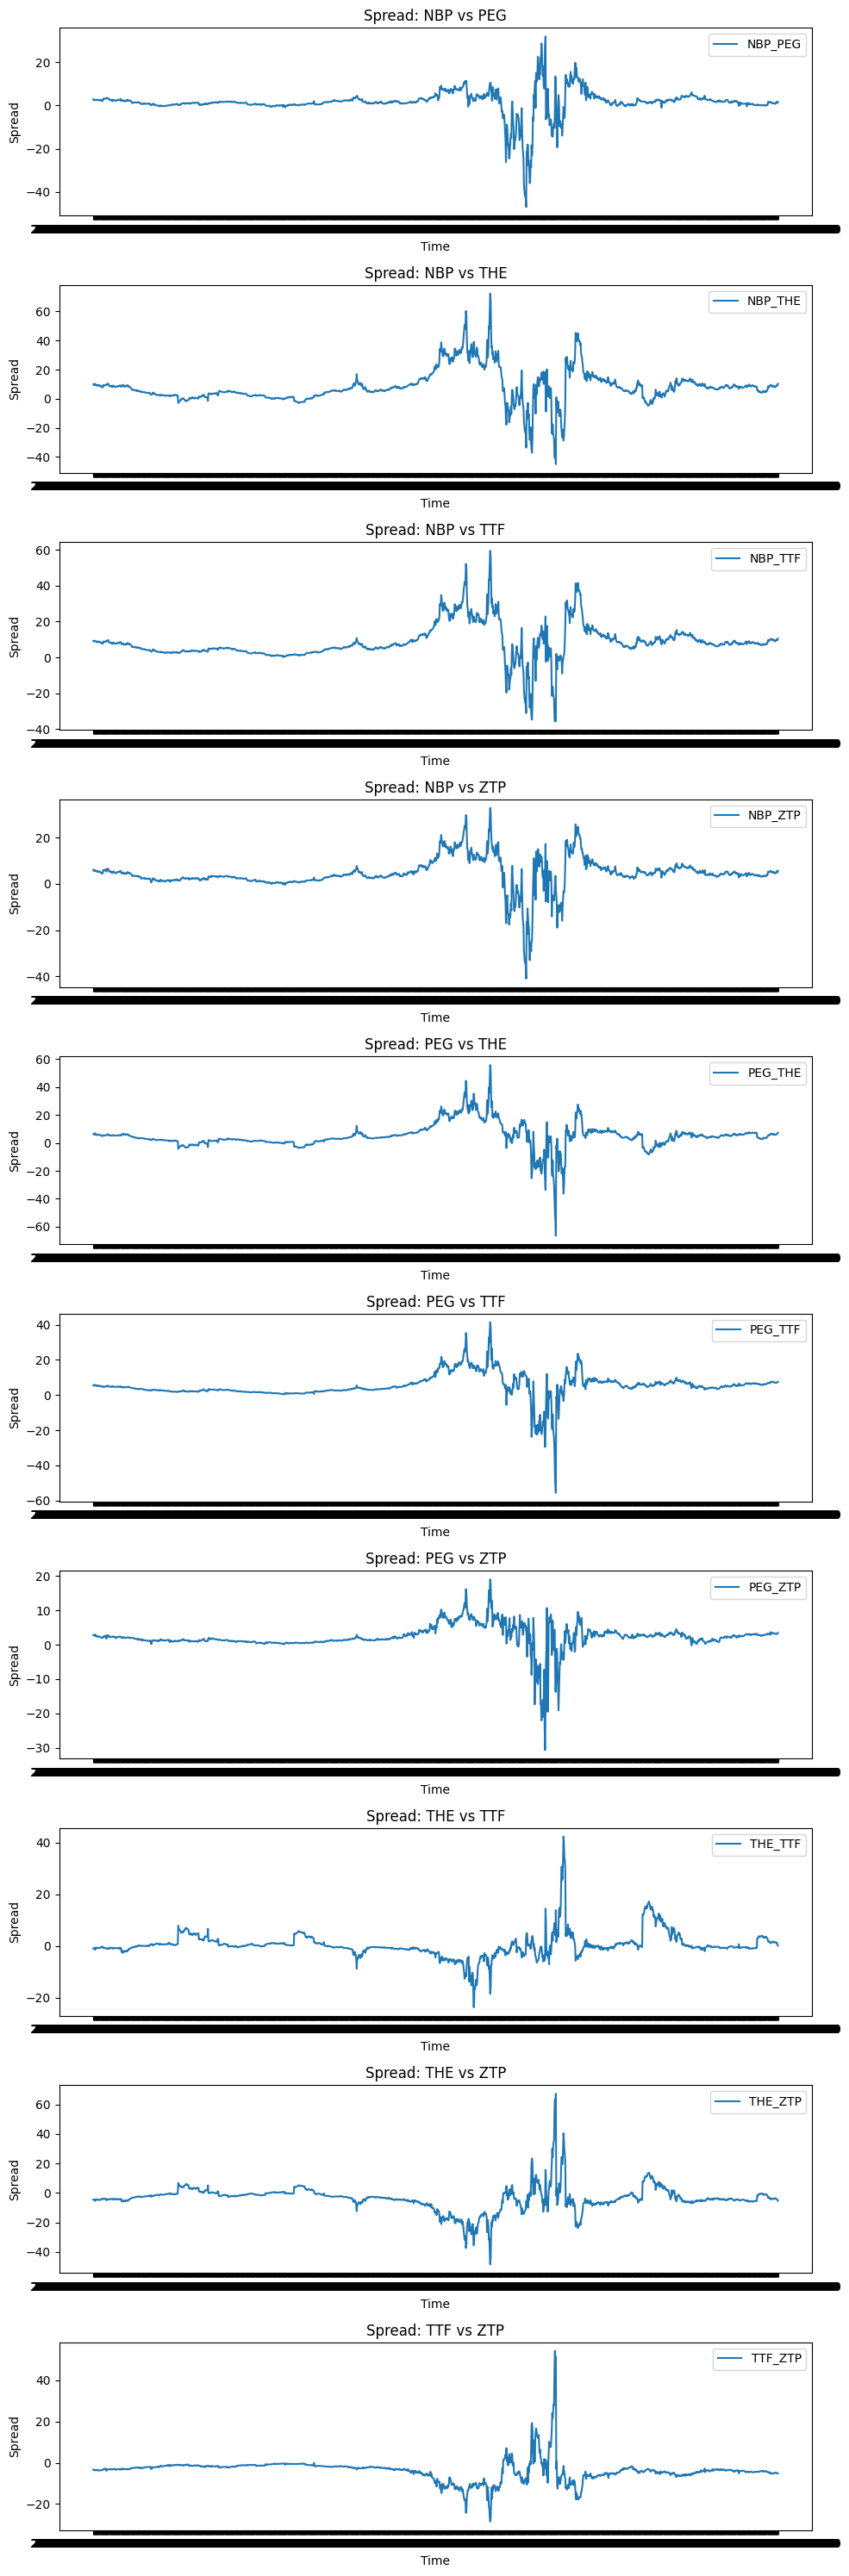

In [64]:

# Plot each spread in a separate subplot
num_spreads = len(spreads_df.columns) - 1  # Exclude the 'Time' column

fig, axes = plt.subplots(nrows=num_spreads, ncols=1, figsize=(10, num_spreads * 3))

for i, col in enumerate(spreads_df.columns[1:]):  # Skip the 'Time' column
    axes[i].plot(spreads_df['Time'], spreads_df[col], label=col)
    axes[i].set_title(f"Spread: {col.replace('_', ' vs ')}")
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Spread')
    axes[i].legend()

plt.tight_layout()
plt.show()


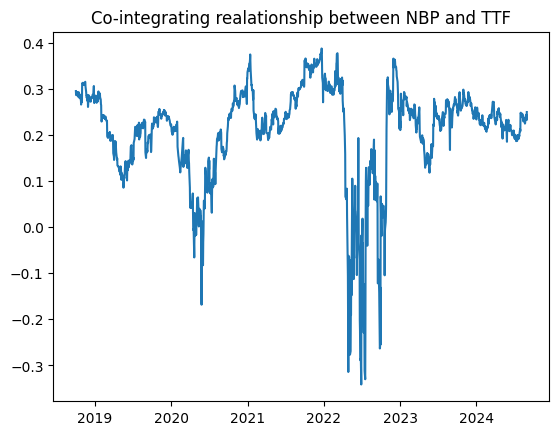

In [179]:
plt.plot(combined_hubs.index, combined_hubs["NBP"] - 0.9263*combined_hubs["TTF"])
plt.title("Co-integrating realationship between NBP and TTF")

plt.show()

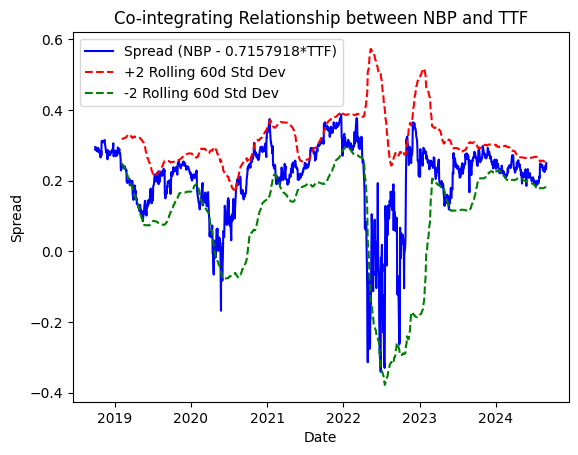

In [181]:
spread = combined_hubs["NBP"] - 0.9263*combined_hubs["TTF"]

# Calculate the 180-day rolling mean and standard deviation of the spread
rolling_mean = spread.rolling(window=90).mean()
rolling_std = spread.rolling(window=90).std()

# Calculate the upper and lower bounds (+2 std dev and -2 std dev)
upper_bound = rolling_mean + 2 * rolling_std
lower_bound = rolling_mean - 2 * rolling_std

# Plot the spread
plt.plot(combined_hubs.index, spread, label="Spread (NBP - 0.7157918*TTF)", color='blue')

# Plot the rolling mean
#plt.plot(combined_hubs.index, rolling_mean, label="180-Day Rolling Mean", color='orange')

# Plot the upper and lower bounds
plt.plot(combined_hubs.index, upper_bound, label="+2 Rolling 60d Std Dev", linestyle='--', color='red')
plt.plot(combined_hubs.index, lower_bound, label="-2 Rolling 60d Std Dev", linestyle='--', color='green')

# Add title and labels
plt.title("Co-integrating Relationship between NBP and TTF")
plt.xlabel("Date")
plt.ylabel("Spread")

# Add legend
plt.legend()

# Show the plot
plt.show()



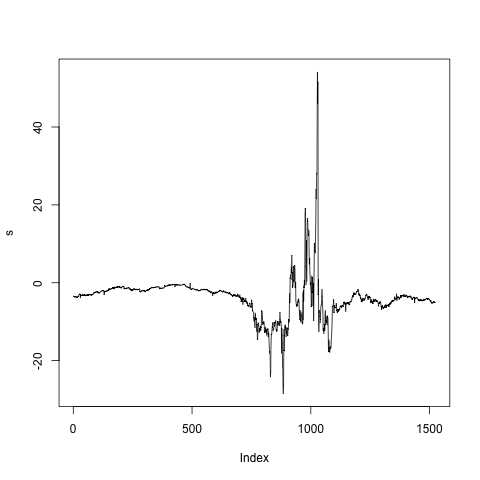

In [110]:
%%R
s<- combined_hubs$TTF - 1.1326944*combined_hubs$ZTP
plot(s, type="l")

In [74]:
%%R
adf.test(combined_hubs$TTF)


	Augmented Dickey-Fuller Test

data:  combined_hubs$TTF
Dickey-Fuller = -2.0682, Lag order = 11, p-value = 0.5495
alternative hypothesis: stationary



In [36]:
%%R
library(help="tseries")

File: /var/folders/f_/fcfn37vd6dxf0sq0ljvgz2kh0000gn/T//RtmpfT1xiq/RpackageInfo10fe9e4159da


		Information on package ‘tseries’



Description:



Package:            tseries

Version:            0.10-55

Title:              Time Series Analysis and Computational Finance

Authors@R:          c(person("Adrian", "Trapletti", role = "aut", email

                    = "adrian@trapletti.org"), person("Kurt", "Hornik",

                    role = c("aut", "cre"), email =

                    "Kurt.Hornik@R-project.org", comment = c(ORCID =

                    "0000-0003-4198-9911")), person("Blake", "LeBaron",

                    role = "ctb", comment = "BDS test code"))

Description:        Time series analysis and computational finance.

Depends:            R (>= 2.10.0)

Imports:            graphics, stats, utils, quadprog, zoo, quantmod (>=

                    0.4-9), jsonlite

License:            GPL-2

NeedsCompilation:   yes

Packaged:           2023-12-06 08:27:57 UTC; hornik

A